In [241]:
import sys
assert sys.version_info >= (3,5)

In [242]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [243]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [244]:
# import os
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [245]:
import pandas as pd

In [246]:
import numpy as np

In [247]:
import tarfile
import urllib
import urllib.request

In [248]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [249]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [250]:
from pandas.plotting import scatter_matrix

In [251]:
happiness=pd.read_csv('./content/drive/MyDrive/ColabNotebooks/Labs/Datasets/happiness.csv')

In [252]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [253]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [254]:
happiness["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [255]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


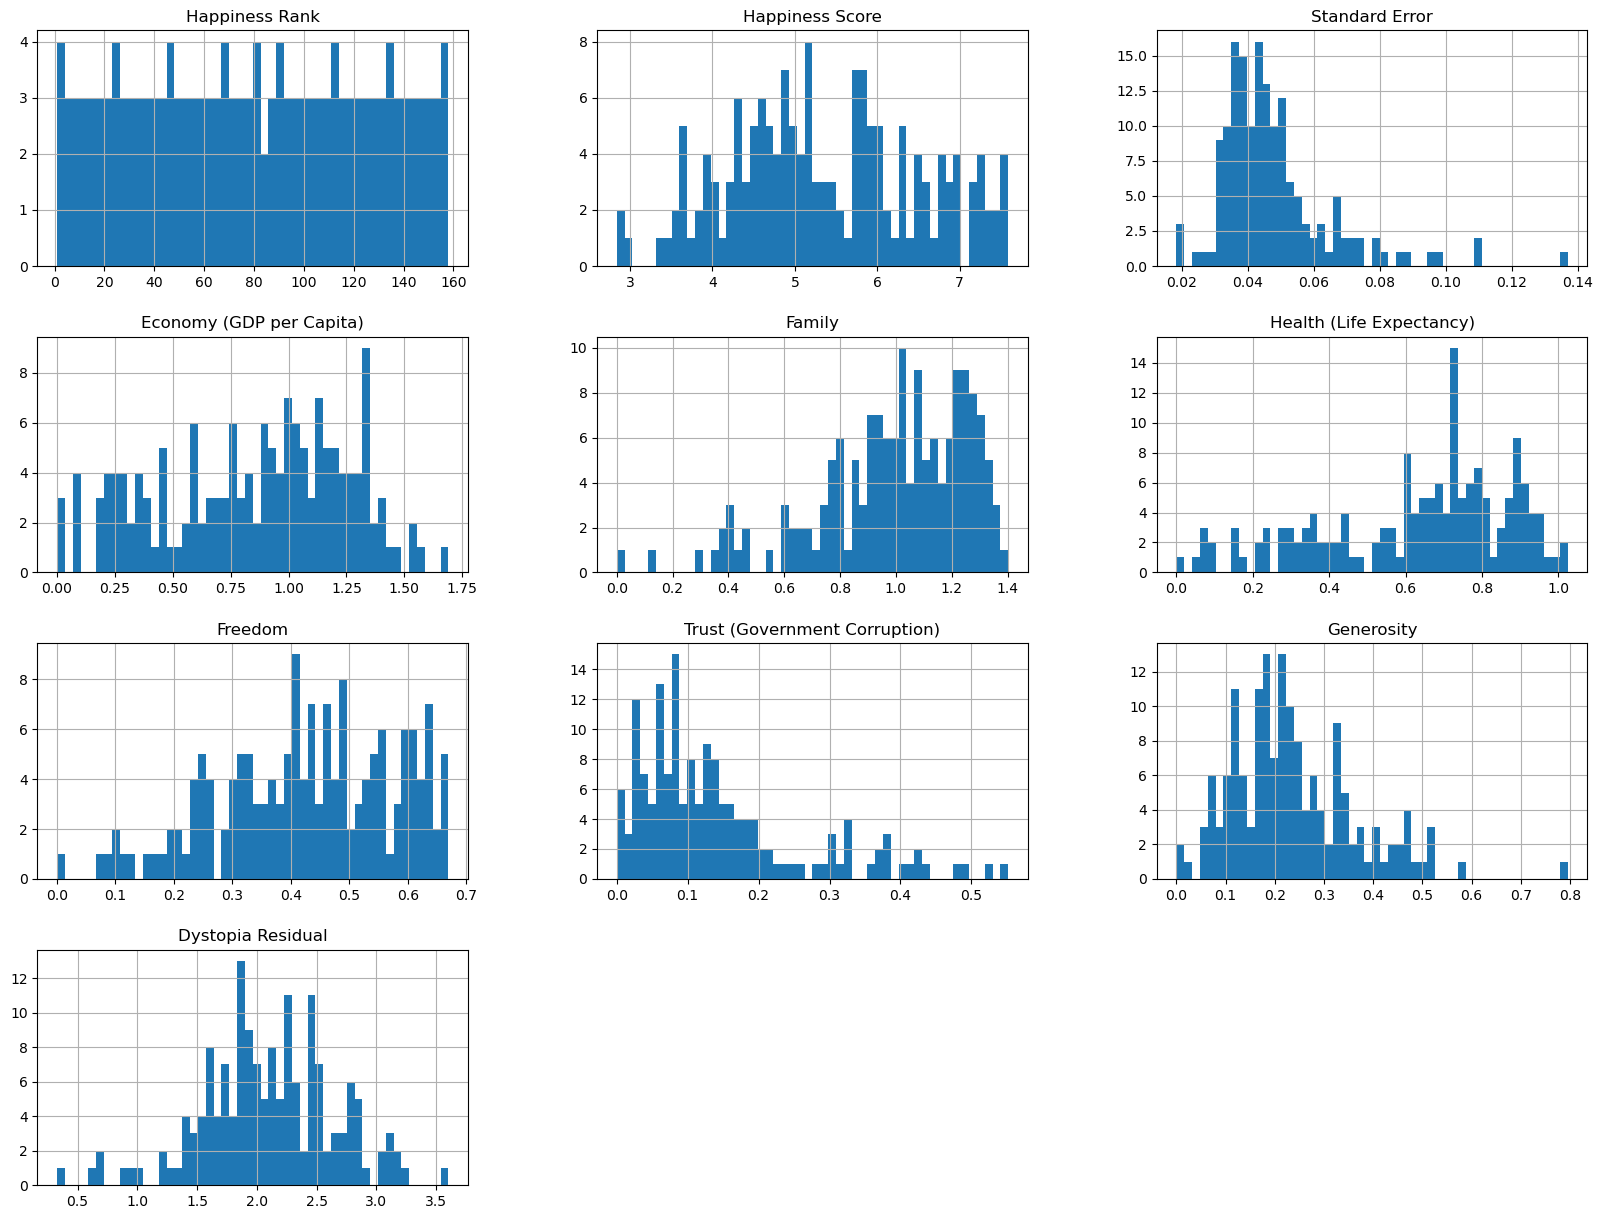

In [256]:
happiness.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

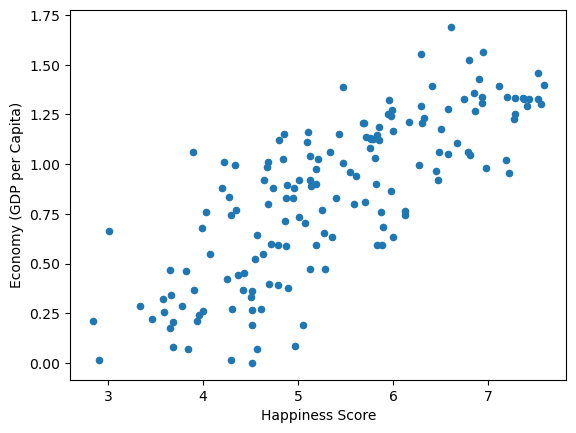

In [257]:
happiness.plot(kind="scatter", x="Happiness Score", y="Economy (GDP per Capita)")

<Axes: xlabel='Happiness Score', ylabel='Family'>

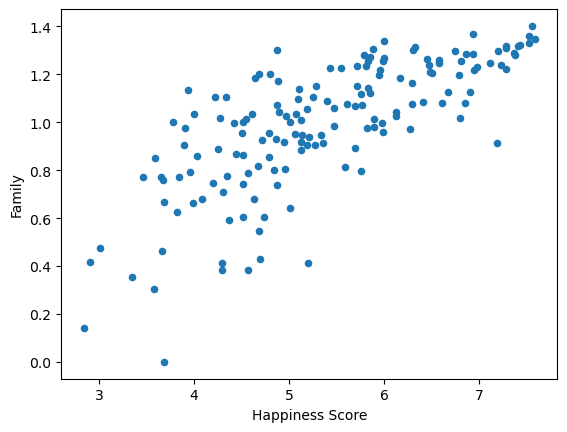

In [258]:
happiness.plot(kind="scatter", x="Happiness Score", y="Family")

<Axes: xlabel='Happiness Score', ylabel='Freedom'>

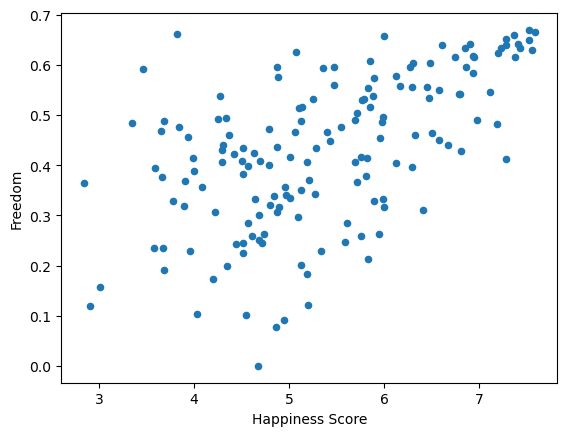

In [259]:
happiness.plot(kind="scatter", x="Happiness Score", y="Freedom")

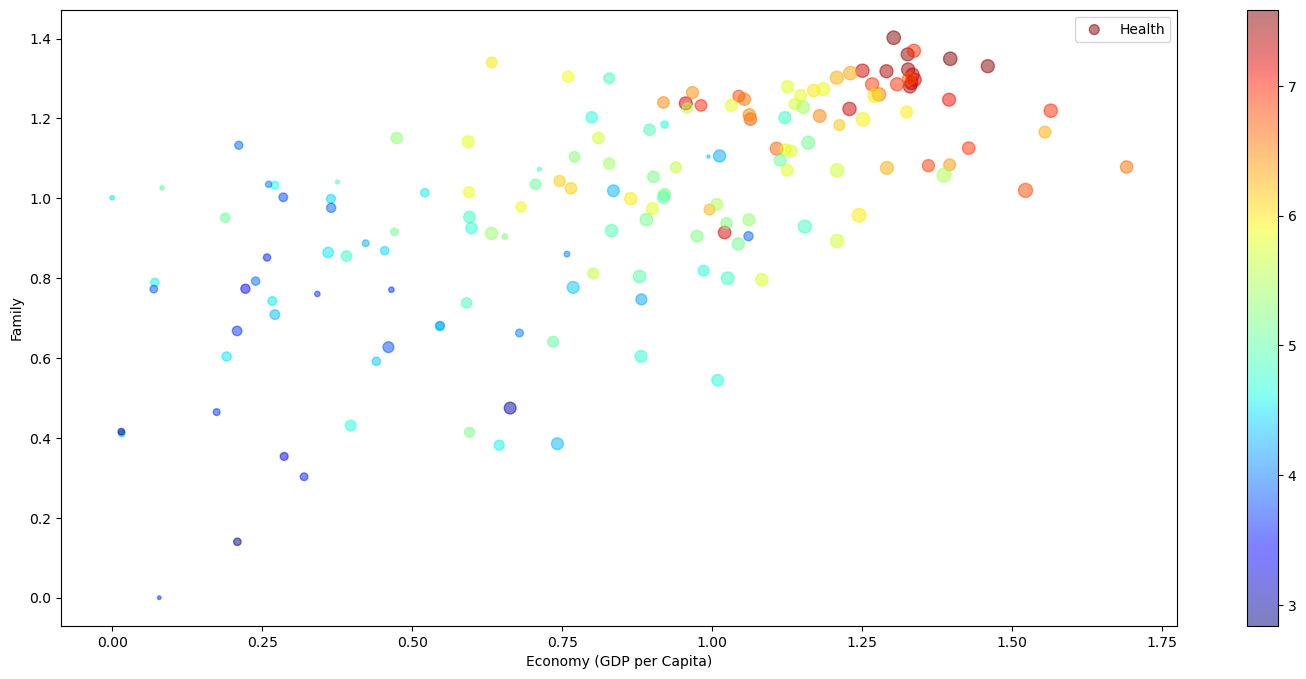

In [260]:
happiness.plot(kind="scatter",x="Economy (GDP per Capita)",y="Family",alpha=0.5,
          s=happiness['Health (Life Expectancy)']*100, label="Health",
          c=happiness["Happiness Score"],figsize=(18,8),cmap=plt.get_cmap("jet"),colorbar=True,
          )
plt.legend()

array([[<Axes: xlabel='Happiness Rank', ylabel='Happiness Rank'>,
        <Axes: xlabel='Happiness Score', ylabel='Happiness Rank'>,
        <Axes: xlabel='Standard Error', ylabel='Happiness Rank'>,
        <Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>,
        <Axes: xlabel='Family', ylabel='Happiness Rank'>,
        <Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Rank'>,
        <Axes: xlabel='Freedom', ylabel='Happiness Rank'>,
        <Axes: xlabel='Trust (Government Corruption)', ylabel='Happiness Rank'>,
        <Axes: xlabel='Generosity', ylabel='Happiness Rank'>,
        <Axes: xlabel='Dystopia Residual', ylabel='Happiness Rank'>],
       [<Axes: xlabel='Happiness Rank', ylabel='Happiness Score'>,
        <Axes: xlabel='Happiness Score', ylabel='Happiness Score'>,
        <Axes: xlabel='Standard Error', ylabel='Happiness Score'>,
        <Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <Axes: xlabel='Family', ylabel='

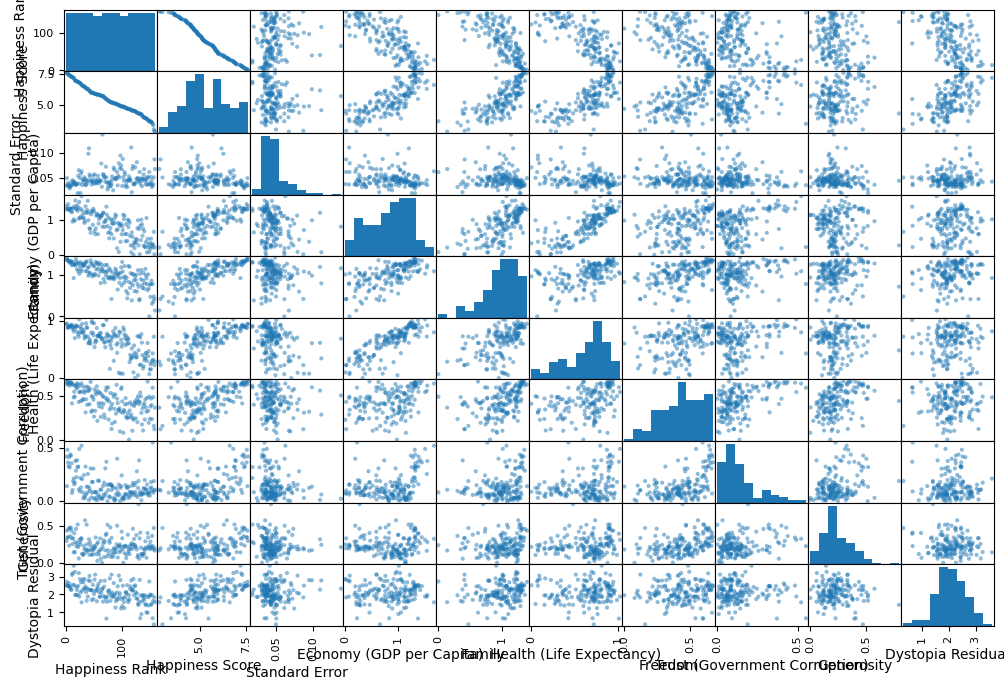

In [261]:
scatter_matrix(happiness, figsize=(12, 8))

<Axes: xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

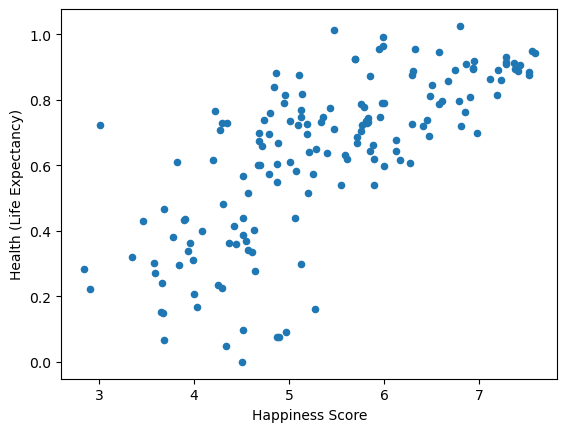

In [262]:
happiness.plot(kind="scatter", x="Happiness Score", y="Health (Life Expectancy)")

<Axes: xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

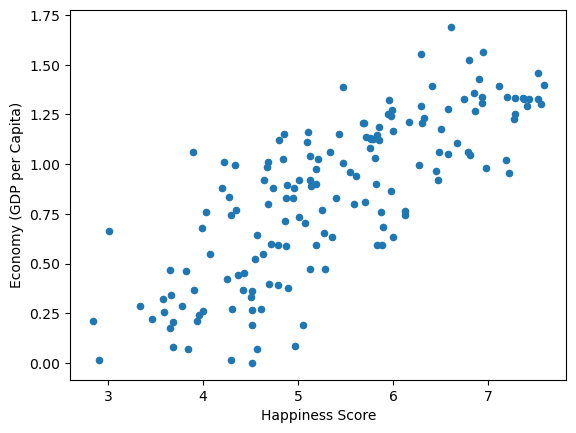

In [263]:
happiness.plot(kind="scatter", x="Happiness Score", y="Economy (GDP per Capita)")

In [264]:
happiness['Region'] = ordinal_encoder.fit_transform(happiness[["Region"]])

In [265]:
happiness['Region']

0      9.0
1      9.0
2      9.0
3      9.0
4      5.0
      ... 
153    8.0
154    8.0
155    4.0
156    8.0
157    8.0
Name: Region, Length: 158, dtype: float64

In [267]:
happiness_corr = happiness[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Dystopia Residual','Trust (Government Corruption)','Happiness Rank']].corr()
happiness_corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64